# ME314 Homework 1 

*Please note that a **single** PDF file will be the only document that you turn in, which will include your answers to the problems with corresponding derivations, and the code used to complete the problems. Problems and deliverables that should be included with your submission are shown in **bold**.*

*This Juputer Notebook file serves as a template for you to start homework, since we recommend to finish the homework using Jupyter Notebook. You can start with this notebook file with your local Jupyter environment, or upload it to Google Colab. You can include all the code and other deliverables in this notebook Jupyter Notebook supports $\LaTeX$ for math equations, and you can export the whole notebook as a PDF file. But this is not the only option, if you are more comfortable with other ways, feel free to do so, as long as you can submit the homework in a single PDF file.*

***

In [1]:
# ##############################################################################################
# # If you're using Google Colab, uncomment this section by selecting the whole section and press
# # ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice 
# # LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
# ##############################################################################################

# import sympy as sym
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
#     javascript(url=url)
#     return sym.printing.latex(exp,**options)
# sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

## Problem 1 (15pts)

In [2]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/2mass_spring.png' width=500' height='350'></table>"))

As shown in the image above, two blocks are connected by one spring, and one block is connected to the wall with another spring. The two springs have lengths of zero when they are "relaxed", thus they are stretched with any positive displacement $\Delta x > 0$, and the magnitude of the force can be computed using Hooke's law $|F| = k \Delta x$, where $k$ is spring ratio. Furthermore, there is no friction between the blocks and the ground. 
    
Now, with the masses $m_1=1kg$, $m_2=2kg$, spring ratios $k_1=0.5N/m$, $k_2=0.8N/m$, given the positions of the blocks as $x_1$ and $x_2$, use Newton's law $F=ma$ to compute the accelerations of the blocks $a_1=\ddot{x}_1$ and $a_2=\ddot{x}_2$. You need to use Pythons's SymPy package to solve for symbolic solutions, then numerically evaluate your solutions for $a_1$ and $a_2$ as functions of $x_1$ and $x_2$. Test your numerical functions with $x_1=1m, x_2=3m$ as function inputs. 

*Hint 1: There will be two equations, one for each block. The equations are based on Newton's law $F=ma$. Thus, for each block you need to write down it's $F$ in terms of $x_1$ and $x_2$ (which can be defined as symbols in SymPy).*

*Hint 2: You will need to use SymPy's **solve()** and **lambdify()** methods in this problem, you've seen both of them in Homework 0. This problem is very similar to Problem 5 in Homework 0,except that you need to write down the equations by yourselves, and you don't need to solve the equations simultaneously, you can solve them one by one for each block. Feel free to take the example code in Homework 0 as a start point.*

*Hint 3: You may need to use **lambdify()** to numerically evaluate a function with multiple variables. Below is an example.*

In [3]:
# import sympy as sym
# from sympy.abc import x, y, z

# expr = sym.sin(x) * y**2 * z + x*z + x/z**2
# print('expression: ')
# display(expr)

# # method 1: the numerical function will take variables one by one
# func = sym.lambdify([x, y, z], expr)
# print('test at x=1, y=2, z=3: ', func(1, 2, 3))

# # method 2: the numerical function will take variables cotained in one list/array
# func = sym.lambdify([[x, y, z]], expr)
# print('test at x=1, y=2, z=3: ', func([1, 2, 3]))

**Turn in: A copy of the code used to solve for symbolic solutions and evaluate them as numerical functions, include the test results for numerical functions.**

In [4]:
import numpy as np
import sympy as sym
from sympy import symbols, Function
from sympy.abc import t

m1 = symbols('m1')
m2 = symbols('m2')
k1 = symbols('k1')
k2 = symbols('k2')

x1 = Function(r'x1')(t)
x2 = Function(r'x2')(t)

print()
x1_ddot = x1.diff(t).diff(t)
x2_ddot = x2.diff(t).diff(t)

print()
print('Newtonian equations of motion for each mass: ')
eqn1 = sym.Eq(m1*x1_ddot, k2*(x2 - x1) - k1*x1)
eqn2 = sym.Eq(m2*x2_ddot, -k2*(x2 - x1))
display(eqn1, eqn2)

x1ddot_solve = sym.solve(eqn1, x1_ddot)
x2ddot_solve = sym.solve(eqn2, x2_ddot)
print()
print('======================================')
print('x1_ddot = ')
display(x1ddot_solve[0])
print()
print('x2_ddot = ')
display(x2ddot_solve[0])
func1 = sym.lambdify([x1, x2, m1, m2, k1, k2], x1ddot_solve)
func2 = sym.lambdify([x1, x2, m1, m2, k1, k2], x2ddot_solve)
print('======================================')
print('Lambdify and solve for a1 with values given: a1 =', func1(1, 3, 1, 2, 0.5, 0.8)[0])
print('Lambdify and solve for a2 with values given: a2 =', func2(1, 3, 1, 2, 0.5, 0.8)[0])




Newtonian equations of motion for each mass: 


Eq(m1*Derivative(x1(t), (t, 2)), -k1*x1(t) + k2*(-x1(t) + x2(t)))

Eq(m2*Derivative(x2(t), (t, 2)), -k2*(-x1(t) + x2(t)))


x1_ddot = 


(-k1*x1(t) - k2*x1(t) + k2*x2(t))/m1


x2_ddot = 


k2*(x1(t) - x2(t))/m2

Lambdify and solve for a1 with values given: a1 = 1.1000000000000003
Lambdify and solve for a2 with values given: a2 = -0.8


## Problem 2 (10pts)

For the same system in Problem 1, now take $x_1$, $x_2$ as system configuration variables, compute the Lagrangian of this system using Python's SymPy package.

*Hint 1: For an object with mass $m$ and velocity $v$, its kinetic energy is $\frac{1}{2} mv^2$.*

*Hint 2: For a spring stretched with displacement $\Delta x$ and spring ratio $k$, its potential energy is $\frac{1}{2} k (\Delta x)^2$. Also, the springs have zero mass.*

*Hint 3: Since $x_1$ and $x_2$ are actually functions of time $t$, in order to compute Euler-Lagrange equations, you will need to take their derivative with respect to $t$. Here instead of defining position and velocity as two seperate symbols, you need to define position as SymPy's **Function** object, and the velocity would be the derivative of that function with respect to time $t$. An example is provided below.*

In [5]:
# import sympy as sym
# from sympy.abc import t
# from sympy import symbols, Function, solve

# # define position as function of t
# x1 = Function(r'x_1')(t)
# # define velocity as derivative of position wrt t
# x1dot = x1.diff(t)
# # define acceleration as derivative of velocity wrt t
# x1ddot = x1dot.diff(t)

# # now write down an expression in terms of position and velocity
# expr = x1**2 + x1*x1dot
# print('expression: ')
# display(expr)
# # you can take the derivative of this expression wrt to time t
# expr_dt = expr.diff(t)
# print('derivative of expression wrt time t: ')
# display(expr_dt)
# # or you can take the derivative wrt the functions: x, xdot, xddot
# expr_dx = expr.diff(x1)
# print('derivative of expression wrt x1(t): ')
# display(expr_dx)



**Turn in: A copy of the code used to symbolically compute the Lagrangian, and the computed Lagrangian.**

In [6]:
from sympy.abc import g

m1 = symbols('m1')
m2 = symbols('m2')
k1 = symbols('k1')
k2 = symbols('k2')

x1 = Function(r'x1')(t)
x2 = Function(r'x2')(t)
x1_dot = x1.diff(t)
x2_dot = x2.diff(t)

kE = (0.5*m1*x1_dot**2) + (0.5*m2*x2_dot**2)
pE = (0.5*k1*x1**2) + (0.5*k2*(x2-x1)**2)

print()
print('Kinetic energy of the system: \nKE =')
display(kE)
print('======================================')
print()
print('Potential energy of the system: \nPE =')
display(pE)

print('======================================')
print()
print('Lagrangian of the 2DOF system: \nL = KE - PE  \n\nL = ')
L = kE - pE
display(L)



Kinetic energy of the system: 
KE =


0.5*m1*Derivative(x1(t), t)**2 + 0.5*m2*Derivative(x2(t), t)**2


Potential energy of the system: 
PE =


0.5*k1*x1(t)**2 + 0.5*k2*(-x1(t) + x2(t))**2


Lagrangian of the 2DOF system: 
L = KE - PE  

L = 


-0.5*k1*x1(t)**2 - 0.5*k2*(-x1(t) + x2(t))**2 + 0.5*m1*Derivative(x1(t), t)**2 + 0.5*m2*Derivative(x2(t), t)**2

## Problem 3 (10pts)

Based on your solution for Problem 2, compute the Euler-Lagrange equations for this system.

*Hint 1: In this problem, the system has two configuration variables, thus when taking the derivative of the Lagrangian with respect to the system state vector, the derivative is also a vector (sometimes also called the Jacobian of the Lagrangian with respect to system states). There are several ways to compute the derivative with respect to a vector in SymPy, below is an example.*

In [7]:
# import sympy as sym
# from sympy.abc import t
# from sympy import symbols, Function, Matrix, sin, cos

# # define two system states as functions
# x1 = Function(r'x_1')(t)
# x2 = Function(r'x_2')(t)
# # wrap system states into one vector (in SymPy would be Matrix)
# q = Matrix([x1, x2])
# # define an expression in terms of x1(t) and x2(t)
# J = sin(x1**2) + cos(x2)**2
# print('expression: ')
# display(J)

# # compute derivative wrt a vector, method 1
# # wrap the expression into a SymPy Matrix
# J_mat = Matrix([J])
# # SymPy Matrix has built-in method for Jacobian
# dJdq = J_mat.jacobian(q)
# print('Derivative of J wrt q: ')
# display(dJdq) # note that dJdq is 1-by-2 vector, not 2-by-1 as q

# # compute derivative wrt a vector, method 2: do it one by one
# dJdx1 = J.diff(x1)
# dJdx2 = J.diff(x2)
# dJdq = Matrix([dJdx1, dJdx2]).T # transpose so dimension can match
# print('Derivative of J wrt q: ')
# display(dJdq)

# # compute derivative wrt a vector, method 3: do it one by one ... but in a "fancy" way
# dJdq = []
# for x in q:
#     dJdq.append(J.diff(x))
# dJdq = Matrix([dJdq])
# print('Derivative of J wrt q: ')
# display(dJdq)

**Turn in: A copy of the code used to symbolically compute the Euler-Lagrange equations, and the equations.**

In [8]:
from sympy import Derivative

dLdx1 = L.diff(x1)
# display(dLdx1)
dldx1dot = L.diff(x1_dot)
# display(dldx1dot)
ddL_dx1dot_t = dldx1dot.diff(t)
display(ddL_dx1dot_t)

#Euler-Lagrange equation for x1:
print('======================================')
print()
print("Euler-Lagrangian equation for x1: ")
el_eqns_x1 = sym.Eq(dLdx1 - ddL_dx1dot_t, 0)
display(el_eqns_x1)

# print('======================================')
# print()
dLdx2 = L.diff(x2)
# display(dLdx2)
dldx2dot = L.diff(x2_dot)
# display(dldx2dot)
ddL_dx2dot_t = dldx2dot.diff(t)
# display(ddL_dx2dot_t)

#Euler-Lagrange equation for x2:
print('======================================')
print()
print("Euler-Lagrangian equation for x2: ")
el_eqns_x2 = sym.Eq(dLdx2 - ddL_dx2dot_t, 0)
display(el_eqns_x2)


1.0*m1*Derivative(x1(t), (t, 2))


Euler-Lagrangian equation for x1: 


Eq(-1.0*k1*x1(t) - 0.5*k2*(2*x1(t) - 2*x2(t)) - 1.0*m1*Derivative(x1(t), (t, 2)), 0)


Euler-Lagrangian equation for x2: 


Eq(-0.5*k2*(-2*x1(t) + 2*x2(t)) - 1.0*m2*Derivative(x2(t), (t, 2)), 0)

## Problem 4 (15pts)

Based on your Euler-Lagrange equations from Problem 3, use Python's SymPy package to solve the equations for the accelerations of the two blocks $\ddot{x}_1, \ddot{x}_2$, in terms of position $x_1, x_2$, and velocity $\dot{x}_1, \dot{x}_2$. Compare your answer to Problem 1 to see if they match with each other.

*Hint 1: Since you need to solve a set of multiple equations symbolically in SymPy, it's recommended to wrap both sides of the equations into SymPy's Matrix object. As an example, below is the code solving the following set of equations (feel free to take this code as a start point).*
$$
\begin{aligned}
\left\{
    \begin{array}{ll}
      x^2 + y = 3 \\
      x + y = 1
    \end{array}
\right.
\end{aligned}
$$

In [9]:
# import sympy as sym
# from sympy.abc import x, y
# from sympy import Eq, Matrix, solve

# # define left hand side as a matrix
# lhs = Matrix([x**2+y, x+y])

# # define right hand side as a Matrix
# rhs = Matrix([3, 1])

# # define the equations
# eqn = Eq(lhs, rhs)

# # solve it for both x and y
# q = Matrix([x, y])
# soln = solve(eqn, q, dict=True) # this will return the solution 
#                                      # as a Python dictionary
# for sol in soln:
#     print('solution: ')
#     for v in q:
#         display(sym.Eq(v, sol[v]))

**Turn in: A copy of the code you used to solve the Euler-Lagrange equations, and thesymbolic solutions you get.**

In [10]:
#
x1_ddot = x1_dot.diff(t)
x2_ddot = x2_dot.diff(t)

el_x1_solve = sym.solve(el_eqns_x1, x1_ddot)
el_x2_solve = sym.solve(el_eqns_x2, x2_ddot)

print('======================================')
print()
print("Euler-Lagrangian equation solved for x1_ddot: \n\nx1_ddot = ")
display(el_x1_solve[0])

print('======================================')
print()
print("Euler-Lagrangian equation solved for x2_ddot: \n\nx2_ddot = ")
display(el_x2_solve[0])


Euler-Lagrangian equation solved for x1_ddot: 

x1_ddot = 


(-k1*x1(t) - k2*x1(t) + k2*x2(t))/m1


Euler-Lagrangian equation solved for x2_ddot: 

x2_ddot = 


k2*(x1(t) - x2(t))/m2

## Problem 5 (10pts)

Given the unforced inverted cart-pendulum as shown below. The pendulum is in gravity, the cart can move freely in the horizontal direction, and the pendulum will not impact the cart. Take $x$ and $\theta$ as the system configuration variables, compute the Lagrangian of the system using Python's SymPy package. Here take $m$ and $M$ as symbols instead of given constants.

*Hint 1: The positive direction for the rotation of the pendulum $\dot{\theta}$ is clockwise. The positive direction for the translation of the cart is to the right.*

*Hint 2: Taking $m$ and $M$ as symbols means you will need to define them as SymPy's symbols.*

*Hint 3: In order to compute the kinetic energy of the pendulum, note that it's attached on the cart, so the velocity of the pendulum needs to take that into account. One suggestion here is to compute the velocity of the pendulum separately from the $x$ and $y$ coordinates.*

In [11]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://raw.githubusercontent.com/MuchenSun/ME314pngs/master/dyninvpend.png' width=500' height='350'></table>"))

**Turn in: A copy of the code used to symbolically compute Lagrangian, and the computed Lagrangian.**

In [12]:
from sympy import cos, sin
from sympy.abc import t

M = symbols('M')
m = symbols('m')
R = symbols('R')
g = symbols('g')

x = Function(r'x')(t)
theta = Function(r'\theta')(t)

xdot = x.diff(t)
xddot = xdot.diff(t)
t_dot = theta.diff(t)
t_ddot = t_dot.diff(t)

#compute KE and PE to get Lagrangian equation
KE = 0.5*M*xdot**2 + 0.5*m*((xdot + R*t_dot*cos(theta))**2 + (-R*t_dot*sin(theta))**2)
print('======================================')
print()
print('Kinetic energy of the system: KE = (KE of mass M) + (KE of mass m) \n\nKE = ')
display(KE)

print('======================================')
print()
print('Potential energy of the system: PE = mgh \n\nPE =')
PE = m*g*R*cos(theta)
display(PE)

#computer Lagrangian
print('======================================')
print()
print('Lagrangian of the inverted pendulum + cart system: L = KE - PE: \n\nL = ')
L = KE - PE
display(L)



Kinetic energy of the system: KE = (KE of mass M) + (KE of mass m) 

KE = 


0.5*M*Derivative(x(t), t)**2 + 0.5*m*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))**2)


Potential energy of the system: PE = mgh 

PE =


R*g*m*cos(\theta(t))


Lagrangian of the inverted pendulum + cart system: L = KE - PE: 

L = 


0.5*M*Derivative(x(t), t)**2 - R*g*m*cos(\theta(t)) + 0.5*m*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))**2)

## Problem 6 (15pts)

Based on your solution in Problem 5, compute the Euler-Lagrange equations for this inverted cart-pendulun system using Python's SymPy package.

**Turn in: A copy of the code used to symbolically compute Euler-Lagrange equations, and the computed Euler-Lagrange equations.**

In [25]:
from sympy import Matrix

#make a matrix out of vectors x and theta. This will make processing the Lagrangian via Jacobian easier
q = Matrix([x, theta])
L_mat = Matrix([L])

#take the derivative of Lagrangian wrt q = [x, theta]
dLdq = L_mat.jacobian(q)
print('=================')
print()
print('dL/dq: ')
display(dLdq)
# display(L)
# display(L_mat)

#take the derivative of Lagrangian wrt q_dot = [xdot, t_dot]. xdot and t_dot are first 
#order time-derivatives of x and theta, respectively
q_dot = Matrix([xdot, t_dot])
dL_dqdot = L_mat.jacobian(q_dot)
print('=================')
print()
print('dL/dq_dot): ')
display(dL_dqdot)

#take time derivative of previous step. this gives the d/dt(dL/dq_dot) term for the
#Euler-Lagrangian equation.
ddt_dL_dqdot = dL_dqdot.diff(t)
print('=================')
print()
print('ddt(dL/dq_dot): ')
display(ddt_dL_dqdot )

#combine previous steps to compute the Euler-Lagrangian
#this is a vector that contains two equations (two terms). One for x_ddot and one for t_ddot
print('=================')
print()
print('Euler-Lagrangian in matrix form: ')
eL = dLdq - ddt_dL_dqdot
display(eL)



dL/dq: 


Matrix([[0, R*g*m*sin(\theta(t)) + 0.5*m*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))*sin(\theta(t))*Derivative(\theta(t), t))]])


dL/dq_dot): 


Matrix([[1.0*M*Derivative(x(t), t) + 0.5*m*(2*R*cos(\theta(t))*Derivative(\theta(t), t) + 2*Derivative(x(t), t)), 0.5*m*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), t) + 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))*cos(\theta(t)))]])


ddt(dL/dq_dot): 


Matrix([[1.0*M*Derivative(x(t), (t, 2)) + 0.5*m*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(x(t), (t, 2))), 0.5*m*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(x(t), (t, 2)))*cos(\theta(t)))]])


Euler-Lagrangian in matrix form: 


Matrix([[-1.0*M*Derivative(x(t), (t, 2)) - 0.5*m*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(x(t), (t, 2))), R*g*m*sin(\theta(t)) + 0.5*m*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))*sin(\theta(t))*Derivative(\theta(t), t)) - 0.5*m*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(x(t), (t, 2)))*cos(\theta(t)))]])

**The E-L symbolic solution is too long to fit on the pdf page so I've included a screenshot at the end of this pdf to capture the full symbolic solution. Please see at the end of this pdf.**

## Problem 7 (15pts)

Solve the Euler-Lagrange equations in Problem 6 for $\ddot{x}$ and $\ddot{\theta}$ using SymPy, and evaluate the results as numerical functions (whose inputs should be $x$, $\theta$, $\dot{x}$ and $\dot{\theta}$) using SymPy's **lambdify()** method, with $M=2, m=1, R=1, g=9.8$. Test your functions with input $x=0, \theta=0.1, \dot{x}=0, \dot{\theta}=0$ as function inputs.

**Turn in: A copy of the code used to symbolically solve and numerically evaluate the solutions of Euler-Lagrange equations. Also, include the test resutls for the numerical evaluations of the solutions.**

In [24]:
q_ddot = q_dot.diff(t)

i = 0
eL_solved = [0]*len(eL)
for i in range(len(eL)):
    eL_solved[i] = sym.solve(eL[i], q_ddot[i], dict=True)
    
    
print('=================')
print()
print('Euler-Lagrangian equation solved for linear acceleration x_ddot: \n\nx_ddot = ')
display(eL_solved[0][0])

print('=================')
print()
print('Euler-Lagrangian equation solved for angular acceleration theta_ddot: \n\ntheta_ddot = ')
display(eL_solved[1][0])


print('=================')
print()
print('Numerical solution: \n')
# xdot_lambdified = sym.lambdify([x, theta, M, m, R, g], xdot)
# tdot_lambdified = sym.lambdify([x, theta, M, m, R, g], t_dot)

soln_x = sym.lambdify([x, theta, xdot, t_dot, M, m, R, g], eL_solved[0][0])
soln_theta = sym.lambdify([x, theta, xdot, t_dot, M, m, R, g], eL_solved[1][0])
print('Euler-Lagrangian numerical solution for x_ddot: \n\nx_ddot = ', 
      soln_x(0, 0.1, 0, 0, 2, 1, 1, 9.8)[0])





Euler-Lagrangian equation solved for linear acceleration x_ddot: 

x_ddot = 


{Derivative(x(t), (t, 2)): R*m*(sin(\theta(t))*Derivative(\theta(t), t)**2 - cos(\theta(t))*Derivative(\theta(t), (t, 2)))/(M + m)}


Euler-Lagrangian equation solved for angular acceleration theta_ddot: 

theta_ddot = 


{Derivative(\theta(t), (t, 2)): (g*sin(\theta(t)) - cos(\theta(t))*Derivative(x(t), (t, 2)))/R}


Numerical solution: 



NameError: name 'Derivative' is not defined

**Tried to resolve 'Derivative' error with suggestions from Thomas J. but still running into errors. Will progress with homework for now.**

In [15]:
#
# q_ddot = q_dot.diff(t)
# eL_solved = sym.solve(eL, q_ddot)
    
    
# # print('=================')
# # print()
# # print('Euler-Lagrangian equation solved for linear acceleration x_ddot: \n\nx_ddot = ')
# # display(eL_solved[0][0])

# # print('=================')
# # print()
# # print('Euler-Lagrangian equation solved for angular acceleration theta_ddot: \n\ntheta_ddot = ')
# # display(eL_solved[1][0])


# print('=================')
# print()
# print('Numerical solution: \n')
# # xdot_lambdified = sym.lambdify([x, theta, M, m, R, g], xdot)
# # tdot_lambdified = sym.lambdify([x, theta, M, m, R, g], t_dot)

# soln_x = sym.lambdify([x, theta, xdot, t_dot, M, m, R, g], eL_solved, modules=sym)
# soln_theta = sym.lambdify([x, theta, xdot, t_dot, M, m, R, g], eL_solved, modules=sym)
# print('Euler-Lagrangian numerical solution for x_ddot: \n\nx_ddot = ', 
#       soln_x(0, 0.1, 0, 0, 2, 1, 1, 9.8)[0])



**For problem 7, I couldn't figure out how to workaround the "name 'Derivative' is not defined" error so will progress the homework without a fix.**

In [31]:
import sympy as sym
from sympy.abc import x, y, t
from sympy import symbols, Function, Eq, Matrix, solve, cos, sin

from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://raw.githubusercontent.com/MuchenSun/ME314pngs/master/dyninvpend.png' width=500' height='350'></table>"))

M = symbols('M')
m = symbols('m')
R = symbols('R')
g = symbols('g')

x = Function(r'x')(t)
theta = Function(r'\theta')(t)

xdot = x.diff(t)
xddot = xdot.diff(t)
t_dot = theta.diff(t)
t_ddot = t_dot.diff(t)

#compute KE and PE to get Lagrangian equation
KE = 0.5*M*xdot**2 + 0.5*m*((xdot + R*t_dot*cos(theta))**2 + (-R*t_dot*sin(theta))**2)
PE = m*g*R*cos(theta)
L = KE - PE
display(L)


#make a matrix out of vectors x and theta. This will make processing the Lagrangian via Jacobian easier
#q-double-dot matrix q_ddot is a vector containing x-double-dot and theta-double-dot.
#these are the configuration variables to solve the E-L equation for.
q = Matrix([x, theta])
q_dot = q.diff(t)
q_ddot = q_dot.diff(t)

L_mat = Matrix([L])

#take the derivative of Lagrangian wrt q = [x, theta]
dLdq = L_mat.jacobian(q).T

#take the derivative of Lagrangian wrt q_dot = [xdot, t_dot]. xdot and t_dot are first 
#order time-derivatives of x and theta, respectively
dL_dqdot = L_mat.jacobian(q_dot).T

#take time derivative of previous step. this gives the d/dt(dL/dq_dot) term for the
#Euler-Lagrangian equation.
ddt_dL_dqdot = dL_dqdot.diff(t)

#combine previous steps to compute the Euler-Lagrangian
#this is a vector that contains two equations (two terms). One for x_ddot and one for t_ddot
eL = sym.Eq(dLdq - ddt_dL_dqdot, Matrix([0, 0]))
print('=================')
print()
print('Euler-Lagrangian equation symbolic solutions: ')
display(eL)

#symbolically solve for the x_ddot and t_ddot variables contained in vector q_ddot
eL_solved = solve(eL, [q_ddot[0], q_ddot[1]]) #symbollically solve for each term in the E-L vector
    
#display the solution for x_ddot and t_ddot
print('=================')
print()
print('Euler-Lagrangian equation solved for linear acceleration x_ddot: \n\nx_ddot = ')
display(eL_solved[xddot])

print('=================')
print()
print('Euler-Lagrangian equation solved for angular acceleration theta_ddot: \n\ntheta_ddot = ')
display(eL_solved[t_ddot])

#substitue constant values. store constant values as a dict to be used as an input into lambdify()
sub_const = {m:1, M:2, g:9.8, R:1}
xddot_sol = eL_solved[xddot].subs(sub_const)
tddot_sol = eL_solved[t_ddot].subs(sub_const)

#find numerical solutions using lambdify()
xddot_func = sym.lambdify([x, theta, xdot, t_dot], xddot_sol)
tddot_func = sym.lambdify([x, theta, xdot, t_dot], tddot_sol)

#test the given values for x, theta, xdot, t_dot
s0 = [0, 0.1, 0, 0]
print('=================')
print()
print('Numerical solutions: \n')
print(f"xddot(0) = {xddot_func(*s0)}")
print(f"tddot(0) = {tddot_func(*s0)}")

#compute the numerical solution using lambdify and the constants given
# soln_x = sym.lambdify([x, theta, xdot, t_dot, M, m, R, g], eL_solved[0][0])
# soln_theta = sym.lambdify([x, theta, xdot, t_dot, M, m, R, g], eL_solved[1][0])
# print('Euler-Lagrangian numerical solution for x_ddot: \n\nx_ddot = ', 
#       soln_x(0, 0.1, 0, 0, 2, 1, 1, 9.8)[0])
    

0.5*M*Derivative(x(t), t)**2 - R*g*m*cos(\theta(t)) + 0.5*m*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))**2)


Euler-Lagrangian equation symbolic solutions: 


Eq(Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                           -1.0*M*Derivative(x(t), (t, 2)) - 0.5*m*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(x(t), (t, 2)))],
[R*g*m*sin(\theta(t)) + 0.5*m*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))*sin(\theta(t))*Derivative(\theta(t), t)) - 0.5*m*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t)


Euler-Lagrangian equation solved for linear acceleration x_ddot: 

x_ddot = 


R*m*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(M*sin(\theta(t))**2 + M*cos(\theta(t))**2 + m*sin(\theta(t))**2) + R*m*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(M*sin(\theta(t))**2 + M*cos(\theta(t))**2 + m*sin(\theta(t))**2) - g*m*sin(\theta(t))*cos(\theta(t))/(M*sin(\theta(t))**2 + M*cos(\theta(t))**2 + m*sin(\theta(t))**2)


Euler-Lagrangian equation solved for angular acceleration theta_ddot: 

theta_ddot = 


M*g*sin(\theta(t))/(M*R*sin(\theta(t))**2 + M*R*cos(\theta(t))**2 + R*m*sin(\theta(t))**2) - R*m*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(M*R*sin(\theta(t))**2 + M*R*cos(\theta(t))**2 + R*m*sin(\theta(t))**2) + g*m*sin(\theta(t))/(M*R*sin(\theta(t))**2 + M*R*cos(\theta(t))**2 + R*m*sin(\theta(t))**2)


Numerical solutions: 

xddot(0) = -0.4843262903458875
tddot(0) = 1.4602741593867283


## Problem 8 (10pts)

Based on your symbolic and numerical solutions for $\ddot{x}(t)$ and $\ddot{\theta}(t)$, which are now functions of $x(t), \theta(t), \dot{x}(t)$ and $\dot{\theta}(t)$, simulate the system for $t\in[0,10]$, with initial condition as $x(0)=0, \theta(0)=0.1, \dot{x}(0)=0, \dot{\theta}(0)=0$, using the numerical integration and simulation functions provided below. Plot the trajectories of $x(t)$ and $\theta(t)$ versus time.

*Hint 1: The numerical simulation function here can only simulate systems with first-order dynamics, which means the dynamics function feeded to numerical integration and simulation functions needs to return the first-order time derivative of the input state. This might be confusing because our solutions $\ddot{x}(t)$ and $\ddot{\theta}(t)$ are second-order time derivative. The trick here is to extend the system state from $[x(t), \theta(t)]$ to $[x(t), \theta(t), \dot{x}(t), \dot{\theta}(t)]$, thus the time derivative of the state vector becomes $[\dot{x}(t), \dot{\theta}(t), \ddot{x}(t), \ddot{\theta}(t)]$. Now, when you write down the system dynamics function, the third and forth elements of input vector $\dot{x}(t)$ and $\dot{\theta}(t)$ can be put into the output vector directly, and we already know the rest two elements of the output vector, from our previous solution of Euler-Lagrange equations. More information can be found in Lecture Note 1 (Backgroud) - Section 1.4 Ordinary Differential Equations. An example is provided below for simulating a particle falling in gravity, where the acceleration $\ddot{x}(t) = -9.8$.*

*Hint 2: You will need to include the numerical evaluations for $\ddot{x}(t)$ and $\ddot{\theta}(t)$ in system dynamics function, you can either use your previous **lambdify()** results, or hand code the equations from previous symbolic solutions. Here using **lambdify()** is recommended, since in later homeworks you will have much more complicated equations.*

**Turn in: A copy of the code used to simulate the system, with the plot of the simulated trajectories.**

In [32]:
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.
    
    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    
    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj 

##############################################
# example: simulate a particle falling in gravity
import numpy as np

def xddot(x, xdot):
    """
    Acceleration of the particle in terms of
    position and velocity. Here it's a constant.
    """
    
    return -9.8

def dyn(s):
    """
    System dynamics function (extended)
    
    Parameters
    ============
    s: NumPy array
        s = [x, xdot] is the extended system
        state vector, includng the position and
        the velocity of the particle
    
    Return
    ============
    sdot: NumPy array
        time derivative of input state vector,
        sdot = [xdot, xddot]
    """
    return np.array([s[1], xddot(s[0], s[1])])

# define initial state
s0 = np.array([10, 0]) # at 10m high with zero velocity
# simulat from t=0 to 10, since dt=0.1, the returned trajectory
# will have 10/0.1=100 time steps, each time step contains extended
# system state vector [x(t), xdot(t)]
traj = simulate(dyn, s0, [0, 10], 0.1, integrate) 
print('shape of traj: ', traj.shape)

shape of traj:  (2, 100)


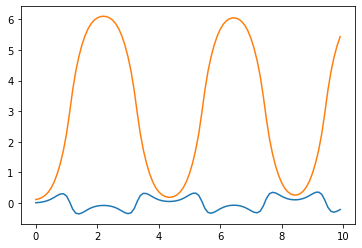

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def cart_pendulum_dyn(q):
    return np.array([q[2], q[3], -xddot_func(q[0], q[1], q[2], q[3]), tddot_func(q[0], q[1], q[2], q[3])])

#initial condition
x0 = np.array([0,0.1, 0, 0])

#simulate
traj = simulate(cart_pendulum_dyn, x0, [0,10], 0.1, integrate)

#plot x(t) and th(t)
plt.plot(np.arange(100)*0.1, traj[0:2].T)
plt.show()


***

## Problem X

*This "Problem X" section is not required for submission and always has zero credit, so please feel no pressure about anything said in this section. This is only designed to help you get more familiar with things that are not the primary purposes of this class, but are important in practice, like Python.*

Now you may have all the code running to compute the dynamics of some "pendulum stuff", and you will need to compute more later in this class. One suggestion here, for the purpose of handling more sophisticated systems (like a triple-pendulum!), is to wrap up your code for this homework into several functions. It's not required, and it's totally fine if you don't want to do it (you can always go back here after you're more familiar with Python and course materials), this is only for some of you who just want to have more Python in their life, just as the saying goes, "life is short, use python".

Why it's better to wrap existing code into functions, isn't it a waste of time? Here is a sort of unrelated example: write a program that computes the trace of a matrix, which is the sum of all diagonal elements. If the matrix is already provided, just like we already computed Lagrangian in the homework, what we can do is like:

In [18]:
mat = [[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]
trace = mat[0][0] + mat[1][1] + mat[2][2]

However, now what if we need to compute the trace of a 5-by-5 matrix? Then we need to rewrite the code. In our simple example, it's not that annoying, but for more complicated problems, it is very annoying, especially when we find that we are basically doing the same thing every time we rewrite the code: manually adding all the diagonal elements together. Thus, why don't we just write a function once, and it will handle matrices with all possible dimensions for us? The challenge here is, for the function, it doesn't know what matrix will be provided. One solution is to require matrix dimension as function input (you might find this very common in lower-level programming languages like C/C++), but in Python, we have better choice, below is how:

In [19]:
def compute_trace(mat):
    dim = len(mat)
    trace_val = 0
    for i in range(dim):
        trace_val += mat[i][i]
    return trace_val

mat = [[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]
trace = compute_trace(mat)

Python provides really nice methods to tell us the dimension of the data, the default is *len()*, and in NumPy or SymPy you can also use {\tt .shape()}. In this way, you can generalize your method through the function, and easily reuse your code later. Besides that, depending on the specific scenarios, some methods can naturally avoid encountering number of parameters, like SymPy's matrix *jacobian()* method. Usually these methods are better choices, because their implementations are typically more efficient than using loops (loops are slow). 
    
In this homework, one part you can re-organize as a function is in Problem 3. **Try to write a Python function, which takes in the Lagrangian, a list of variables of the Lagrangian, and returns the Euler-Lagrange equation as a SymPy equation object.** The challenge here is we don't know how many variables will be provided, and the example above might inspire you. 
    
Here one template is provided below, which you can take as a start point. Note that it's always highly recommended to document your function as shown below, letting others understand your code is as important as getting your code run.

In [20]:
def euler_equations(L, funcs, t):
    """
    Find the Euler-Lagrangian equations given the Lagrangian equation.

    Parameters:
    ============
    L: SymPy Expression
        L should be a SymPy expression containing necessary system 
        configuration variables
    funcs: list of SymPy Functions
        func should included all the system configuration variables
        as functions of time variable "t" in the Lagrangian
    t: SymPy Symbol
        time variable

    Returns:
    ============
    eqns: SymPy Equation
        eqns is the resulting Euler-Lagrangian equations, it should
        be a sinlge SymPy Equation object, each side being a SymPy
        Matrix object
    """
    pass # In Python, "pass" means "do nothing",  many people use it
         # to occupy a space so they don't need to implement a function
         # while getting the program running. Here you just need to 
         # replace it with your own implementation.